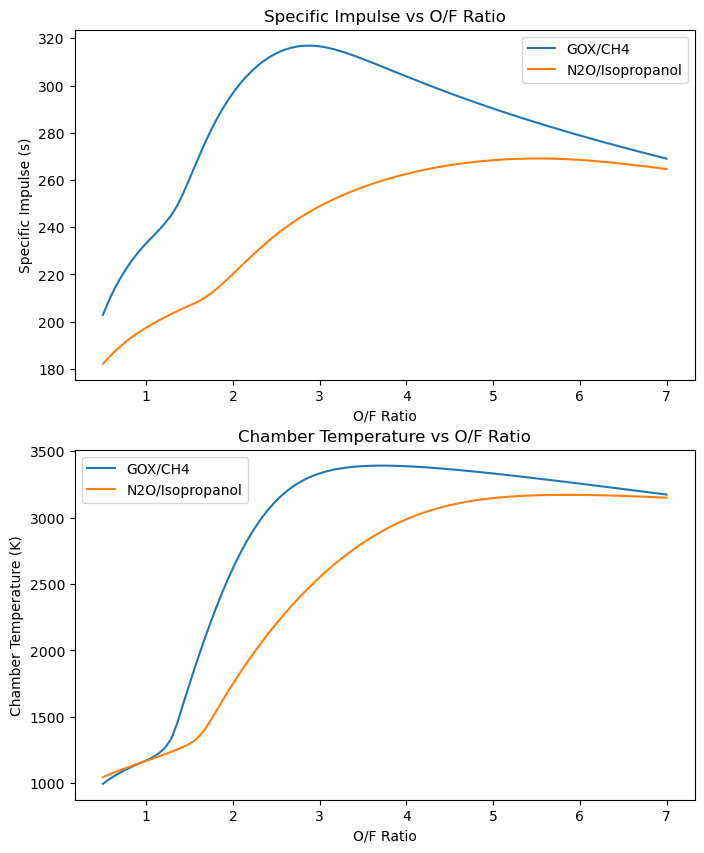

In [5]:
from rocketcea.cea_obj_w_units import CEA_Obj
import numpy as np
import matplotlib.pyplot as plt

OFs = np.linspace(0.5, 7, 100)  # Oxidizer-to-fuel ratios

propellent_combinations = [
    ("GOX", "CH4"),
    ("N2O", "Isopropanol"),
]

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
isp_plot = axs[0]
isp_plot.set_title("Specific Impulse vs O/F Ratio")
isp_plot.set_xlabel("O/F Ratio")
isp_plot.set_ylabel("Specific Impulse (s)")
tc_plot = axs[1]
tc_plot.set_title("Chamber Temperature vs O/F Ratio")
tc_plot.set_xlabel("O/F Ratio")
tc_plot.set_ylabel("Chamber Temperature (K)")

for ox, fuel in propellent_combinations:
    cea = CEA_Obj(
        oxName = ox,
        fuelName = fuel,
        isp_units='sec',
        cstar_units = 'm/s',
        pressure_units='Bar',
        temperature_units='K',
        sonic_velocity_units='m/s',
        enthalpy_units='J/g',
        density_units='kg/m^3',
        specific_heat_units='J/kg-K',
        viscosity_units='centipoise', # stored value in pa-s
        thermal_cond_units='W/cm-degC', # stored value in W/m-K
        # fac_CR=self.cr,
        make_debug_prints=False)

    isp_values = np.zeros_like(OFs)
    chamber_temps = np.zeros_like(OFs)
    for i, OF in enumerate(OFs):
        isp_values[i] = cea.get_Isp(Pc=15, MR=OF, eps=5)
        chamber_temps[i] = cea.get_Tcomb(Pc=15, MR=OF)

    
    isp_plot.plot(OFs, isp_values, label=f"{ox}/{fuel}")
    isp_plot.legend()

    tc_plot.plot(OFs, chamber_temps, label=f"{ox}/{fuel}")
    tc_plot.legend()

In [18]:
from rocketcea.cea_obj_w_units import CEA_Obj
import numpy as np

cea = CEA_Obj(
        oxName = "GOX",
        fuelName = "CH4",
        isp_units='sec',
        cstar_units = 'm/s',
        pressure_units='Bar',
        temperature_units='K',
        sonic_velocity_units='m/s',
        enthalpy_units='J/kg',
        density_units='kg/m^3',
        specific_heat_units='J/kg-K',
        viscosity_units='centipoise', # stored value in pa-s
        thermal_cond_units='W/cm-degC', # stored value in W/m-K
        # fac_CR=self.cr,
        make_debug_prints=False)

Pc=150  # Chamber pressure in Bar
MR=1  # Mixture ratio
eps=50   # Expansion ratio

enthalpies = cea.get_Enthalpies(Pc=Pc, MR=MR, eps=eps)
exit_velocity = cea.get_SonicVelocities(Pc=Pc, MR=MR, eps=eps)[2] * cea.get_MachNumber(Pc=Pc, MR=MR, eps=eps)

delta_h = enthalpies[0] - enthalpies[2]
delta_h_calculated = 0.5 * exit_velocity**2
rel_diff = abs((delta_h - delta_h_calculated) / delta_h)
print(f"Delta H: {delta_h:<10.4g} J/kg, relative difference: {rel_diff:.4g}")

Delta H: 3.52e+06   J/kg, relative difference: 6.801e-06


In [25]:
from rocketcea.cea_obj import CEA_Obj
import numpy as np 

C = CEA_Obj(oxName='N2O', fuelName='Isopropanol')
c = 1
for i in range(1, 10000):
    c += C.get_Isp(Pc=10, MR=0.5 + i * 0.00001, eps=5 + i * 0.0001)

print(c)

1795772.2153535776
